<h1><center>Lab 6 </center></h1>

## **WORK DURING THE LAB**
1. Implement an evolutionary algorithm to find the optimum of the Sphere function.
    - Population initialization for real codification
    - Crossover operator
    - Mutation operator
    - Fitness function
2. Test the algorithm for different parameter settings.


In [85]:
import numpy as np

# Sphere function
def sphere_function(x: np.ndarray) -> float:
    """
    Calculate the Sphere function value for a given individual.
    Input:
        x: np.ndarray, an individual represented as an array of real numbers
    Output:
        float: the Sphere function value
    """
    return np.sum(x**2)

# Fitness function
def fitness_function(population: np.ndarray) -> np.ndarray:
    """
    Calculate the fitness values for a population of individuals.
    Input:
        population: np.ndarray, a population of individuals
    Output:
        np.ndarray: an array of fitness values for the population
    """
    return np.array([sphere_function(individual) for individual in population])

In [83]:
import random


# Define the population
def generate_population(size: int, dimensions: int) -> np.ndarray:
    """
    Generate a population of individuals with real codification.
    Input:
        size: int, size of the population
        dimensions: int, number of dimensions for each individual
    Output:
        np.ndarray: a population of size `size` with individuals of `dimensions` dimensions
    """
    return np.random.uniform(-5.12, 5.12, (size, dimensions))

def complete_average_crossover(parent1: np.ndarray, parent2: np.ndarray) -> np.ndarray:
    """
    Perform complete average crossover between two parents.
    Each gene i of the offspring will be the average of the corresponding genes of the parents.
    Input:
        parent1: np.ndarray, first parent
        parent2: np.ndarray, second parent
    Output:
        np.ndarray: offspring
    """
    return (parent1 + parent2) / 2

def normally_distributed_mutation(individual: np.ndarray, sigma: float, mutation_rate: float) -> np.ndarray:
    """
    Perform normally distributed mutation on an individual with a given mutation rate.
    Input:
        individual: np.ndarray, the individual to mutate
        sigma: float, standard deviation of the normal distribution
        mutation_rate: float, probability of mutating each gene
    Output:
        np.ndarray: mutated individual
    """
    for i in range(len(individual)):
        if np.random.rand() < mutation_rate:
            individual[i] += np.random.normal(0, sigma)
    return individual

def select_tournament(population: np.ndarray, fitness: np.ndarray) -> np.ndarray:
    """
    Selects the best individual out of 3 randomly selected individuals from the population.
    Input:
        population: np.ndarray, population of individuals
        fitness: np.ndarray, fitness values of the population
    Output:
        np.ndarray: the selected individual
    """
    selected_indices = random.sample(range(len(population)), 3)
    selected_individuals = population[selected_indices]
    selected_fitness = fitness[selected_indices]
    best_index = np.argmin(selected_fitness)  # Minimizing the Sphere function
    return selected_individuals[best_index]

def replace_population(population: np.ndarray, offsprings: np.ndarray) -> np.ndarray:
    """
    Replace the worst individuals in the population with the offsprings.
    Input:
        population: np.ndarray, current population
        offsprings: np.ndarray, new offsprings to be added
    Output:
        np.ndarray: updated population
    """
    # Combine population and offsprings
    combined_population = np.vstack((population, offsprings))

    combined_fitness = np.array([sphere_function(individual) for individual in combined_population])

    # Sort combined population by fitness (ascending order for minimization)
    sorted_indices = np.argsort(combined_fitness)
    sorted_population = combined_population[sorted_indices]

    # Select the best individuals to form the new population
    new_population = sorted_population[:len(population)]

    return new_population

In [81]:
def evolutionary_algorithm1(population_size: int, dimensions: int, generations: int, mutation_rate: float, sigma: float) -> tuple[list[float], float]:
    """
    Run the evolutionary algorithm to optimize the Sphere function.
    Input:
        population_size: int, size of the population
        dimensions: int, number of dimensions for each individual
        generations: int, number of generations to run the algorithm
        mutation_rate: float, probability of mutating each gene
        sigma: float, standard deviation of the normal distribution for mutation
    Output:
        np.ndarray: best individual found
        float: fitness value of the best individual
    """
    population = generate_population(population_size, dimensions)

    for generation in range(generations):
        fitness = fitness_function(population)

        population = sorted(population, key=lambda ind: sphere_function(ind))
        prime_population = [select_tournament(np.array(population), fitness) for _ in range(population_size)]

        offsprings = []
        for i in range(0, len(prime_population), 2):
            offspring = complete_average_crossover(prime_population[i], prime_population[i + 1])
            offspring = normally_distributed_mutation(offspring, sigma, mutation_rate)
            offsprings.append(offspring)

        # Replace population with new offsprings
        population = replace_population(np.array(population), np.array(offsprings))

    # Return the best individual found
    best_individual_index = np.argmin(fitness_function(population))
    return population[best_individual_index], fitness_function(population)[best_individual_index]

In [86]:
import numpy as np

# Ensure values are printed with fixed-point notation
np.set_printoptions(suppress=True, precision=10)

best_val, best_fitness = evolutionary_algorithm1(100, 10, 1000, 0.2, 0.1)


print("Best individual found:", best_val)
print("Best fitness value:", f"{best_fitness:.10f}")


Best individual found: [ 0.0002892124  0.0002255687  0.0000014926 -0.0001906523 -0.0001515696
  0.0000017866 -0.0007237272  0.0001665527 -0.0000030352 -0.0001160681]
Best fitness value: 0.0000007589


In [54]:
best_val, best_fitness = evolutionary_algorithm1(500, 10, 2000, 0.3, 0.1)

print("Best individual found:", best_val)
print("Best fitness value:", f"{best_fitness:.10f}")

Best individual found: [ 0.000133 -0.000075  0.000038 -0.000166 -0.0001    0.000092 -0.000171
  0.00007  -0.000095  0.000154]
Best fitness value: 0.0000001377


# **ASSIGNMENT A6**
1. Implement and test an evolutionary algorithm for the Sphere function and one other
function from the list below.
2. Compare at least 2 different selection strategies for parent selection.
3. Compare at least 2 different crossover operators.
4. Compare at least 2 different mutation operators.


In [39]:
# Import necessary libraries
import matplotlib.pyplot as plt
import random
import numpy as np
import time

#### Crossover options:
   - **Complete average crossover**: Each gene i of the offspring will be the average of the corresponding genes of the parents.
   - **Discrete crossover**: Each gene i of the offspring will be randomly selected from one of the parents.

In [87]:
import numpy as np

def complete_average_crossover(parent1: np.ndarray, parent2: np.ndarray) -> np.ndarray:
    """
    Perform complete average crossover between two parents.
    Each gene i of the offspring will be the average of the corresponding genes of the parents.
    Input:
        parent1: np.ndarray, first parent
        parent2: np.ndarray, second parent
    Output:
        np.ndarray: offspring
    """
    return (parent1 + parent2) / 2

def discrete_crossover(parent1: np.ndarray, parent2: np.ndarray) -> np.ndarray:
    """
    Perform discrete crossover between two parents.
    Each gene i of the offspring will be randomly selected from one of the parents.
    Input:
        parent1: np.ndarray, first parent
        parent2: np.ndarray, second parent
    Output:
        np.ndarray: offspring
    """
    offspring = np.empty_like(parent1)
    for i in range(len(parent1)):
        if np.random.rand() < 0.5:
            offspring[i] = parent1[i]
        else:
            offspring[i] = parent2[i]
    return offspring

#### Mutation options:
   - **Normally distributed mutation**: Each gene i of the individual will be mutated with a probability of mutation_rate.
   - **Uniform mutation**: Each gene i of the individual will be mutated to a random value within a specified range.

In [88]:
def normally_distributed_mutation(individual: np.ndarray, mutation_rate: float, sigma: float = 0.1) -> np.ndarray:
    """
    Perform normally distributed mutation on an individual with a given mutation rate.
    Input:
        individual: np.ndarray, the individual to mutate
        sigma: float, standard deviation of the normal distribution
        mutation_rate: float, probability of mutating each gene
    Output:
        np.ndarray: mutated individual
    """
    for i in range(len(individual)):
        if np.random.rand() < mutation_rate:
            individual[i] += np.random.normal(0, sigma)
    return individual

def uniform_mutation(individual: np.ndarray, mutation_rate: float, lower_bound: float, upper_bound: float) -> np.ndarray:
    """
    Perform uniform mutation on an individual with a given mutation rate.
    Input:
        individual: np.ndarray, the individual to mutate
        mutation_rate: float, probability of mutating each gene
        lower_bound: float, lower bound of the mutation range
        upper_bound: float, upper bound of the mutation range
    Output:
        np.ndarray: mutated individual
    """
    for i in range(len(individual)):
        if np.random.rand() < mutation_rate:
            individual[i] = np.random.uniform(lower_bound, upper_bound)
    return individual

#### Selection options:
   - **Tournament selection**: Selects the best individual out of 3 randomly selected individuals from the population.
   - **Roulette wheel selection**: Each individual has a probability of being selected proportional to its fitness value.

In [89]:
def select_tournament(population: np.ndarray, fitness: np.ndarray, k: int = 3) -> np.ndarray:
    """
    Selects the best individual out of k randomly selected individuals from the population.
    Input:
        population: np.ndarray, population of individuals
        fitness: np.ndarray, fitness values of the population
        k: int, number of individuals to randomly select for the tournament
    Output:
        np.ndarray: the selected individual
    """
    selected_indices = random.sample(range(len(population)), k)
    selected_individuals = population[selected_indices]
    selected_fitness = fitness[selected_indices]
    best_index = np.argmin(selected_fitness)  # Minimizing the fitness function
    return selected_individuals[best_index]

def select_roulette_wheel(population: np.ndarray, fitness: np.ndarray) -> np.ndarray:
    """
    Selects an individual based on roulette wheel selection.
    Input:
        population: np.ndarray, population of individuals
        fitness: np.ndarray, fitness values of the population
    Output:
        np.ndarray: the selected individual
    """
    # Ensure fitness values are non-negative by shifting them
    min_fitness = np.min(fitness)
    if min_fitness < 0:
        fitness = fitness - min_fitness

    # Invert fitness values for minimization problems
    inverted_fitness = 1 / (fitness + 1e-10)  # Add a small constant to avoid division by zero

    # Calculate selection probabilities
    total_fitness = np.sum(inverted_fitness)
    probabilities = inverted_fitness / total_fitness

    # Select an individual based on probabilities
    selected_index = np.random.choice(range(len(population)), p=probabilities)
    return population[selected_index]

#### General **Evolutionary Algorithm** general function

In [90]:
def evolutionary_algorithm(
    population_size: int,
    dimensions: int,
    generations: int,
    mutation_rate: float,
    lower_bound: float,
    upper_bound: float,
    selection_method: str = 'tournament',
    crossover_method: str = 'complete_average',
    mutation_method: str = 'normally_distributed',
    fitness_function=None,
    generate_population=None,
    replace_population=None
) -> tuple[np.ndarray, float]:
    """
    Run the evolutionary algorithm to optimize a given function.
    Input:
        population_size: int, size of the population
        dimensions: int, number of dimensions for each individual
        generations: int, number of generations to run the algorithm
        mutation_rate: float, probability of mutating each gene
        lower_bound: float, lower bound of the mutation range
        upper_bound: float, upper bound of the mutation range
        selection_method: str, method for parent selection ('tournament' or 'roulette_wheel')
        crossover_method: str, method for crossover ('complete_average' or 'discrete')
        mutation_method: str, method for mutation ('normally_distributed' or 'uniform')
        fitness_function: function, fitness function to optimize
        generate_population: function, function to generate the initial population
        replace_population: function, function to replace the population with offsprings
    Output:
        np.ndarray: best individual found
        float: fitness value of the best individual
    """
    population = generate_population(population_size, dimensions)

    # Define selection function
    if selection_method == 'tournament':
        select = select_tournament
    elif selection_method == 'roulette_wheel':
        select = select_roulette_wheel
    else:
        raise ValueError("Invalid selection method")

    # Define crossover function
    if crossover_method == 'complete_average':
        crossover = complete_average_crossover
    elif crossover_method == 'discrete':
        crossover = discrete_crossover
    else:
        raise ValueError("Invalid crossover method")

    # Define mutation function
    if mutation_method == 'normally_distributed':
        mutate = normally_distributed_mutation
    elif mutation_method == 'uniform':
        mutate = lambda ind, rate: uniform_mutation(ind, rate, lower_bound, upper_bound)
    else:
        raise ValueError("Invalid mutation method")

    for generation in range(generations):
        fitness = np.array([fitness_function(ind) for ind in population])

        population = sorted(population, key=lambda ind: fitness_function(ind))
        prime_population = [select(np.array(population), fitness) for _ in range(population_size)]

        offsprings = []
        for i in range(0, len(prime_population), 2):
            offspring = crossover(prime_population[i], prime_population[i + 1])
            offspring = mutate(offspring, mutation_rate)
            offsprings.append(offspring)

        # Replace population with new offsprings
        population = replace_population(np.array(population), np.array(offsprings))

    # Return the best individual found
    best_individual_index = np.argmin(np.array([fitness_function(ind) for ind in population]))
    return population[best_individual_index], fitness_function(population[best_individual_index])

## The Sphere function
![Function](https://www.sfu.ca/~ssurjano/spheref.png)

![Formula](https://www.sfu.ca/~ssurjano/spheref2.png)

#### Optimum:

![Global minimum](https://www.sfu.ca/~ssurjano/spheref3.png)

#### **General functions** for the Sphere EA


In [91]:
import numpy as np
import random

def sphere_function(individual: np.ndarray) -> float:
    """
    Calculate the Sphere function value for a given individual.
    Input:
        individual: np.ndarray, an individual (solution) with 'n' dimensions
    Output:
        float: the fitness value (Sphere function value)
    """
    return np.sum(individual**2)

def fitness_function_sphere(population: np.ndarray) -> np.ndarray:
    """
    Calculate the fitness values for a population of individuals using the Sphere function.
    Input:
        population: np.ndarray, a population of individuals
    Output:
        np.ndarray: an array of fitness values for the population
    """
    return np.array([sphere_function(individual) for individual in population])

def generate_population_sphere(size: int, dimensions: int) -> np.ndarray:
    """
    Generate a population of individuals with real codification for the Sphere function.
    Input:
        size: int, size of the population
        dimensions: int, number of dimensions for each individual
    Output:
        np.ndarray: a population of size `size` with individuals of `dimensions` dimensions
    """
    return np.random.uniform(-5.12, 5.12, (size, dimensions))

def replace_population_sphere(population: np.ndarray, offsprings: np.ndarray) -> np.ndarray:
    """
    Replace the worst individuals in the population with the offsprings for the Sphere function.
    Input:
        population: np.ndarray, current population
        offsprings: np.ndarray, new offsprings to be added
    Output:
        np.ndarray: updated population
    """
    # Combine population and offsprings
    combined_population = np.vstack((population, offsprings))

    combined_fitness = np.array([sphere_function(individual) for individual in combined_population])

    # Sort combined population by fitness (ascending order for minimization)
    sorted_indices = np.argsort(combined_fitness)
    sorted_population = combined_population[sorted_indices]

    # Select the best individuals to form the new population
    new_population = sorted_population[:len(population)]

    return new_population

### Comparison of Sphere function EA configurations for different dimensions
   - **Default**, **Discrete Crossover**, and **Roulette Wheel Selection**  performed well for all dimensions.
   - **Discrete Crossover** got a worse value for `2` dimension but performed very well for others because with more dimensions, each individual has more genes to explore, and the discrete crossover allows for more diversity in the offspring.
   - **Uniform Mutation** performs badly for any dimension bigger then `2` because replacing a value randomly is very likely to get a worse value than the original one and the **Sphere** function is smooth and continuous, so small changes like the ones in a Normal distribution are more likely to lead to better results.

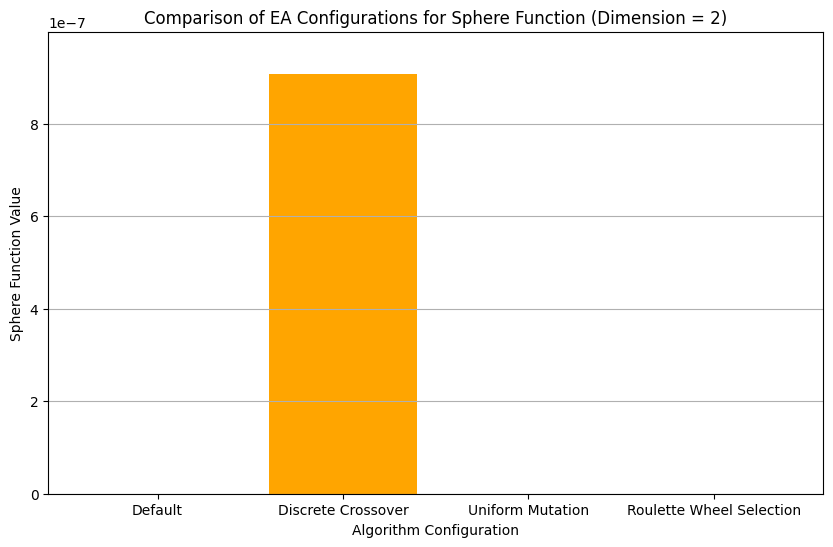

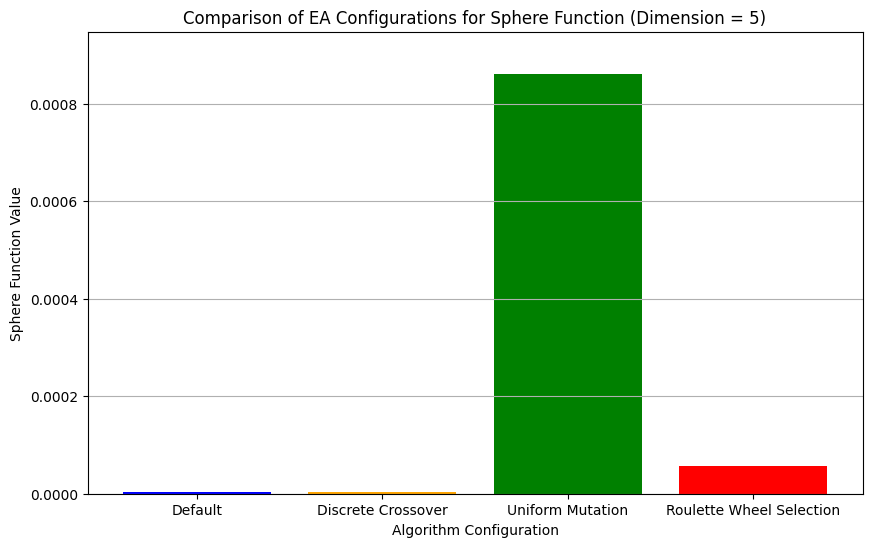

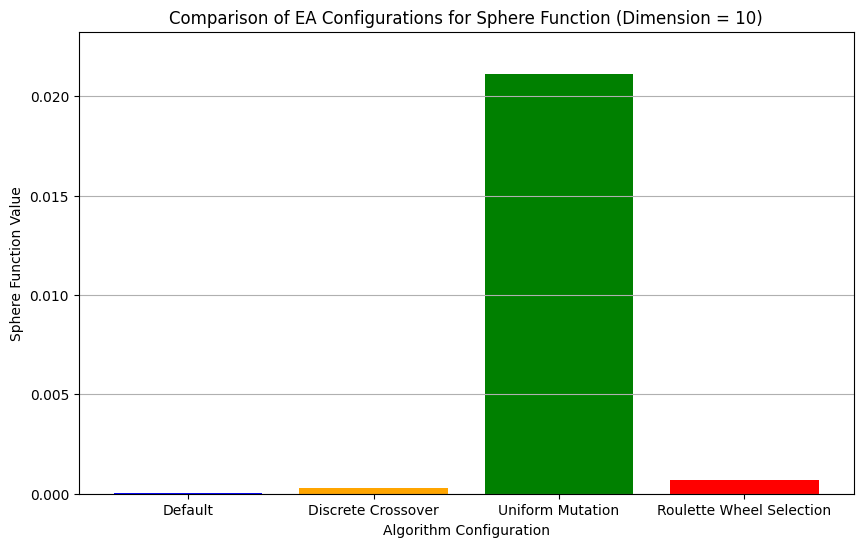

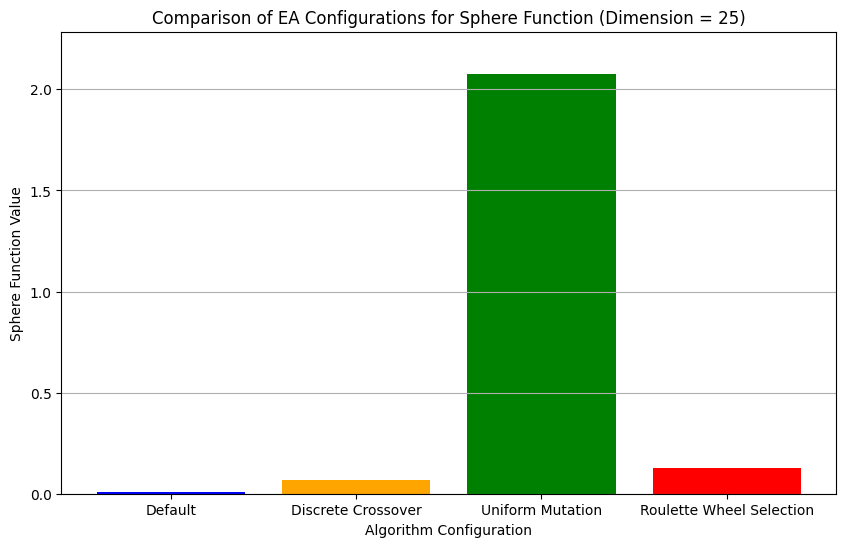

In [94]:
# Parameters
population_size = 100
generations = 100
mutation_rate = 0.2
dimensions_list = [2, 5, 10, 25]

# Function to run the evolutionary algorithm with different configurations
def run_ea_with_configurations(dimensions):
    configurations = [
        ('Default', {}),
        ('Discrete Crossover', {'crossover_method': 'discrete'}),
        ('Uniform Mutation', {'mutation_method': 'uniform'}),
        ('Roulette Wheel Selection', {'selection_method': 'roulette_wheel'})
    ]

    abs_diffs = []
    for config_name, config_params in configurations:
        best_val, _ = evolutionary_algorithm(
            population_size, dimensions, generations, mutation_rate, -5.12, 5.12,
            fitness_function=sphere_function,
            generate_population=generate_population_sphere,
            replace_population=replace_population_sphere,
            **config_params
        )
        abs_diff = np.sum(best_val**2)  # Sphere function value
        abs_diffs.append((config_name, abs_diff))
    return abs_diffs

# Dictionary to store absolute differences for all dimensions
all_abs_diffs = {}

# Run the evolutionary algorithm for each dimension and store the results
for dimensions in dimensions_list:
    abs_diffs = run_ea_with_configurations(dimensions)
    all_abs_diffs[dimensions] = abs_diffs

# Plot the results for each dimension
for dimensions, abs_diffs in all_abs_diffs.items():
    # Create bar plot
    plt.figure(figsize=(10, 6))
    labels, values = zip(*abs_diffs)
    colors = ['blue', 'orange', 'green', 'red']
    plt.bar(labels, values, color=colors)

    # Update layout
    plt.title(f'Comparison of EA Configurations for Sphere Function (Dimension = {dimensions})')
    plt.xlabel('Algorithm Configuration')
    plt.ylabel('Sphere Function Value')
    plt.ylim(0, max(values) * 1.1)  # Add some space above the highest bar
    plt.grid(axis='y')

    # Show plot
    plt.show()

### Comparison of Sphere function EA configurations for different generations
   - The **Default** configuration runs the best as far as my tests can tell.
   - **Uniform Mutation** is by far the worst choice of the four configurations.

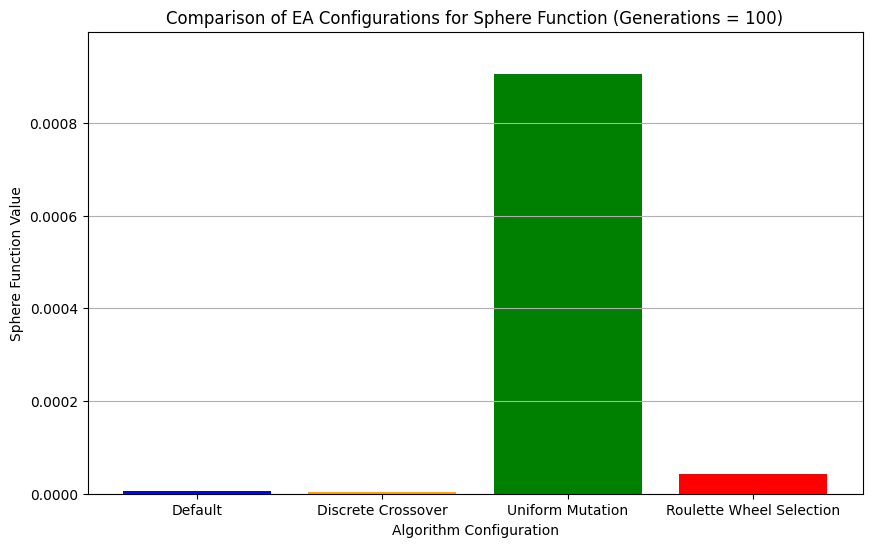

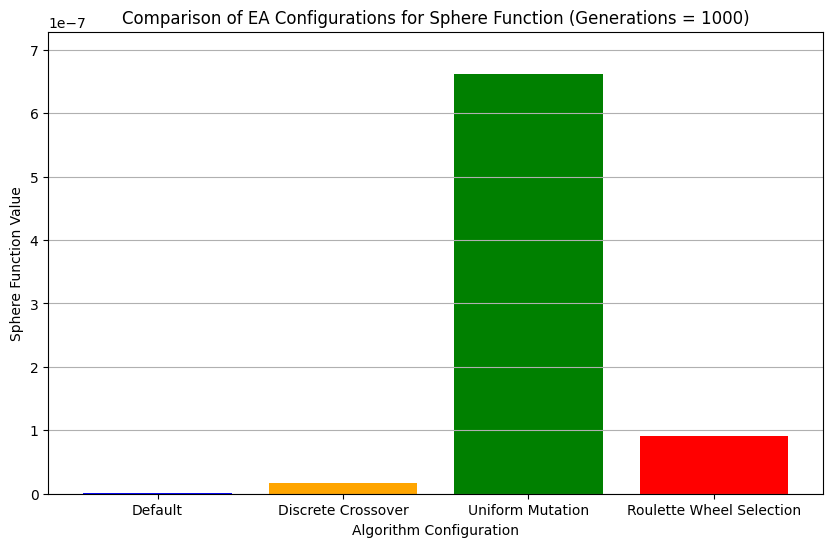

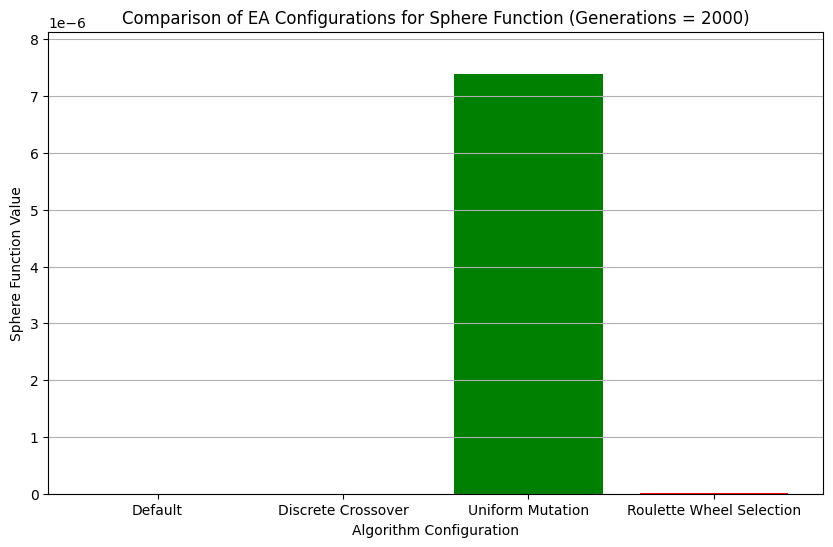

In [93]:
# Parameters
population_size = 100
mutation_rate = 0.2
dimensions = 5
generations_list = [100, 1000, 2000]

# Function to run the evolutionary algorithm with different configurations
def run_ea_with_generations(generations):
    configurations = [
        ('Default', {}),
        ('Discrete Crossover', {'crossover_method': 'discrete'}),
        ('Uniform Mutation', {'mutation_method': 'uniform'}),
        ('Roulette Wheel Selection', {'selection_method': 'roulette_wheel'})
    ]

    abs_diffs = []
    for config_name, config_params in configurations:
        best_val, _ = evolutionary_algorithm(
            population_size, dimensions, generations, mutation_rate, -5.12, 5.12,
            fitness_function=sphere_function,
            generate_population=generate_population_sphere,
            replace_population=replace_population_sphere,
            **config_params
        )
        abs_diff = np.sum(best_val**2)  # Sphere function value
        abs_diffs.append((config_name, abs_diff))
    return abs_diffs

# Dictionary to store absolute differences for all generations
all_abs_diffs = {}

# Run the evolutionary algorithm for each generation and store the results
for generations in generations_list:
    abs_diffs = run_ea_with_generations(generations)
    all_abs_diffs[generations] = abs_diffs

# Plot the results for each generation
for generations, abs_diffs in all_abs_diffs.items():
    # Create bar plot
    plt.figure(figsize=(10, 6))
    labels, values = zip(*abs_diffs)
    colors = ['blue', 'orange', 'green', 'red']
    plt.bar(labels, values, color=colors)

    # Update layout
    plt.title(f'Comparison of EA Configurations for Sphere Function (Generations = {generations})')
    plt.xlabel('Algorithm Configuration')
    plt.ylabel('Sphere Function Value')
    plt.ylim(0, max(values) * 1.1)  # Add some space above the highest bar
    plt.grid(axis='y')

    # Show plot
    plt.show()

## The Styblinski-Tang function
![Function](https://www.sfu.ca/~ssurjano/stybtang.png)

![Formula](https://www.sfu.ca/~ssurjano/spheref2.png)

#### Optimum:

![Global minimum](https://www.sfu.ca/~ssurjano/stybtang3.png)

#### **General functions** for the Styblinski-Tang EA

In [46]:
import numpy as np
import random

def styblinski_tang_function(individual: np.ndarray) -> float:
    """
    Calculate the Styblinski-Tang function value for a given individual.
    Input:
        individual: np.ndarray, an individual (solution) with 'n' dimensions
    Output:
        float: the fitness value (Styblinski-Tang value)
    """
    return 0.5 * np.sum(individual**4 - 16*individual**2 + 5*individual)

def fitness_function_styblinski_tang(population: np.ndarray) -> np.ndarray:
    """
    Calculate the fitness values for a population of individuals using the Styblinski-Tang function.
    Input:
        population: np.ndarray, a population of individuals
    Output:
        np.ndarray: an array of fitness values for the population
    """
    return np.array([styblinski_tang_function(individual) for individual in population])

def generate_population_styblinski_tang(size: int, dimensions: int) -> np.ndarray:
    """
    Generate a population of individuals with real codification for the Styblinski-Tang function.
    Input:
        size: int, size of the population
        dimensions: int, number of dimensions for each individual
    Output:
        np.ndarray: a population of size `size` with individuals of `dimensions` dimensions
    """
    return np.random.uniform(-5, 5, (size, dimensions))

def replace_population_styblinski_tang(population: np.ndarray, offsprings: np.ndarray) -> np.ndarray:
    """
    Replace the worst individuals in the population with the offsprings for the Styblinski-Tang function.
    Input:
        population: np.ndarray, current population
        offsprings: np.ndarray, new offsprings to be added
    Output:
        np.ndarray: updated population
    """
    # Combine population and offsprings
    combined_population = np.vstack((population, offsprings))

    combined_fitness = np.array([styblinski_tang_function(individual) for individual in combined_population])

    # Sort combined population by fitness (ascending order for minimization)
    sorted_indices = np.argsort(combined_fitness)
    sorted_population = combined_population[sorted_indices]

    # Select the best individuals to form the new population
    new_population = sorted_population[:len(population)]

    return new_population

def get_global_minimum_styblinski_tang(dimensions: int) -> float:
    """
    Get the global minimum for the Styblinski-Tang function.
    Input:
        dimensions: int, number of dimensions
    Output:
        float: global minimum
    """
    return -39.16599 * dimensions

def get_absolute_difference_styblinski_tang(individual: np.ndarray) -> float:
    """
    Calculate the absolute difference between the Styblinski-Tang function value and the global minimum.
    Input:
        individual: np.ndarray, an individual (solution) with 'n' dimensions
    Output:
        float: absolute difference
    """
    return abs(styblinski_tang_function(individual) - get_global_minimum_styblinski_tang(len(individual)))


### Comparison of EA configurations for different dimensions
   - For a little amount of dimensions as `2`, the absolute difference is very low and all configurations are performing well.
   - Overall, **Discrete Crossover** performed great over all dimensions
   - For `25` dimensions the results were pretty far from the global minimum, but that is expected over just `100` generations.

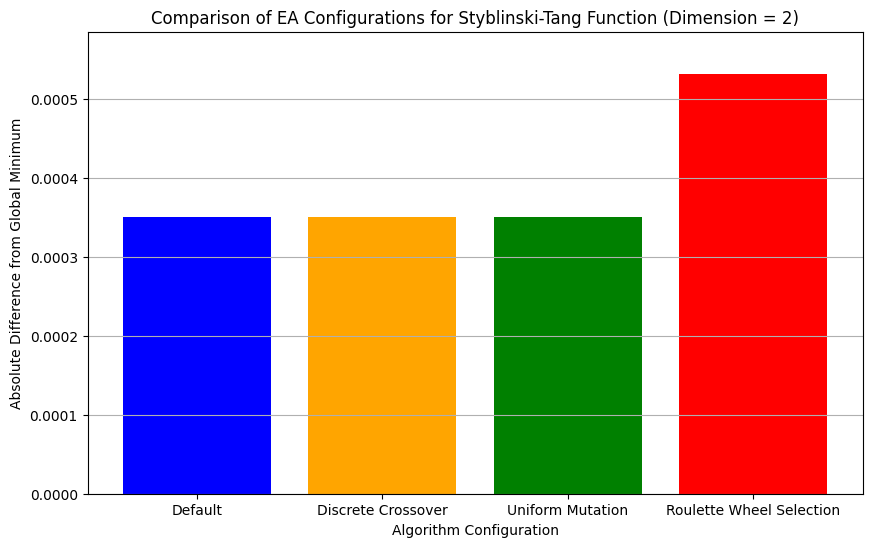

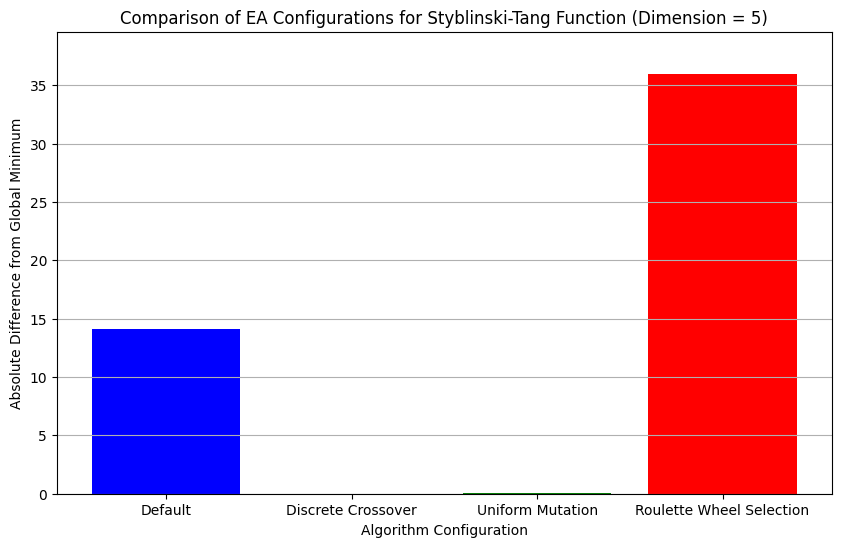

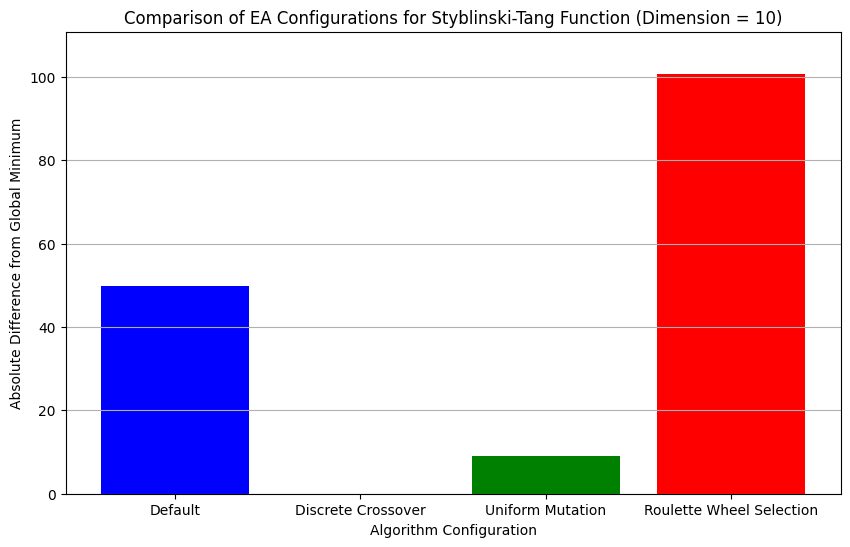

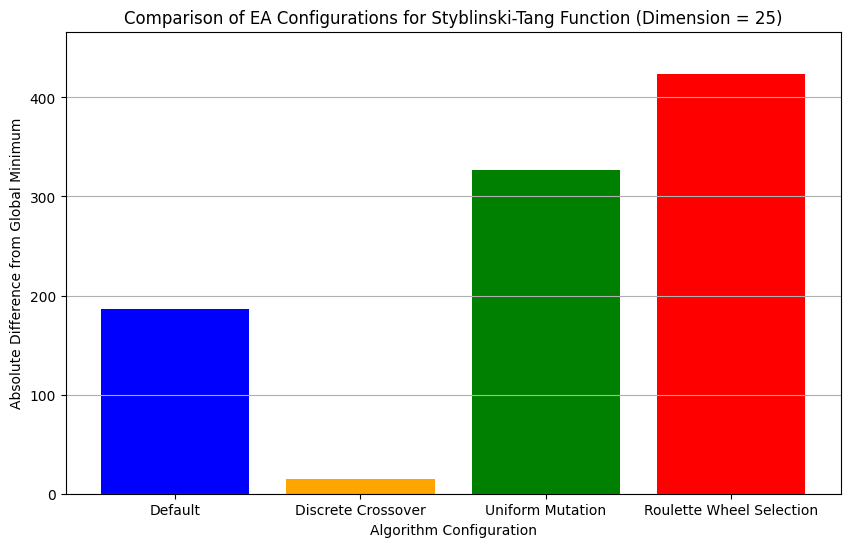

In [30]:
# Parameters
population_size = 100
generations = 100
mutation_rate = 0.2
dimensions_list = [2, 5, 10, 25]

# Function to run the evolutionary algorithm with different configurations
def run_ea_with_configurations(dimensions):
    configurations = [
        ('Default', {}),
        ('Discrete Crossover', {'crossover_method': 'discrete'}),
        ('Uniform Mutation', {'mutation_method': 'uniform'}),
        ('Roulette Wheel Selection', {'selection_method': 'roulette_wheel'})
    ]

    abs_diffs = []
    for config_name, config_params in configurations:
        best_val, _ = evolutionary_algorithm(
            population_size, dimensions, generations, mutation_rate, -5, 5,  **config_params, fitness_function=styblinski_tang_function, generate_population=generate_population_styblinski_tang, replace_population=replace_population_styblinski_tang
        )
        abs_diff = get_absolute_difference_styblinski_tang(best_val)
        abs_diffs.append((config_name, abs_diff))
    return abs_diffs

# Dictionary to store absolute differences for all dimensions
all_abs_diffs = {}

# Run the evolutionary algorithm for each dimension and store the results
for dimensions in dimensions_list:
    abs_diffs = run_ea_with_configurations(dimensions)
    all_abs_diffs[dimensions] = abs_diffs

# Plot the results for each dimension
for dimensions, abs_diffs in all_abs_diffs.items():
    # Create bar plot
    plt.figure(figsize=(10, 6))
    labels, values = zip(*abs_diffs)
    colors = ['blue', 'orange', 'green', 'red']
    plt.bar(labels, values, color=colors)

    # Update layout
    plt.title(f'Comparison of EA Configurations for Styblinski-Tang Function (Dimension = {dimensions})')
    plt.xlabel('Algorithm Configuration')
    plt.ylabel('Absolute Difference from Global Minimum')
    plt.ylim(0, max(values) * 1.1)  # Add some space above the highest bar
    plt.grid(axis='y')

    # Show plot
    plt.show()

### Comparison of EA configurations for different generations
   - For selected dimensions count `5`, **Discrete Crossover** and **Uniform Mutation** achieve almost perfect results.
   - Interestingly, **Default** performs worse after `2000` generations compared to `1000` generations because over many generations, especially without decaying mutation, too many generations can cause the algorithm to "forget" the good solutions.
   - The **Roulette Wheel Selection** method is not as effective as the **Tournament Selection** method, which is evident in the results.

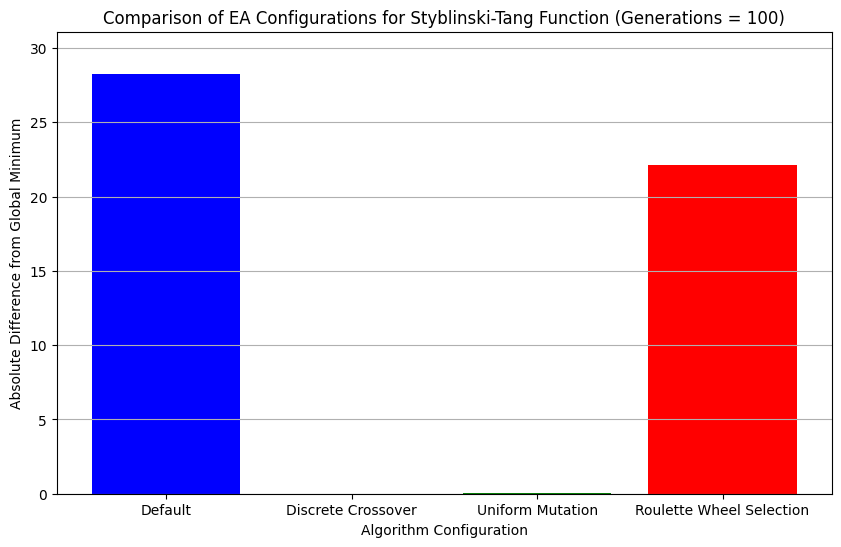

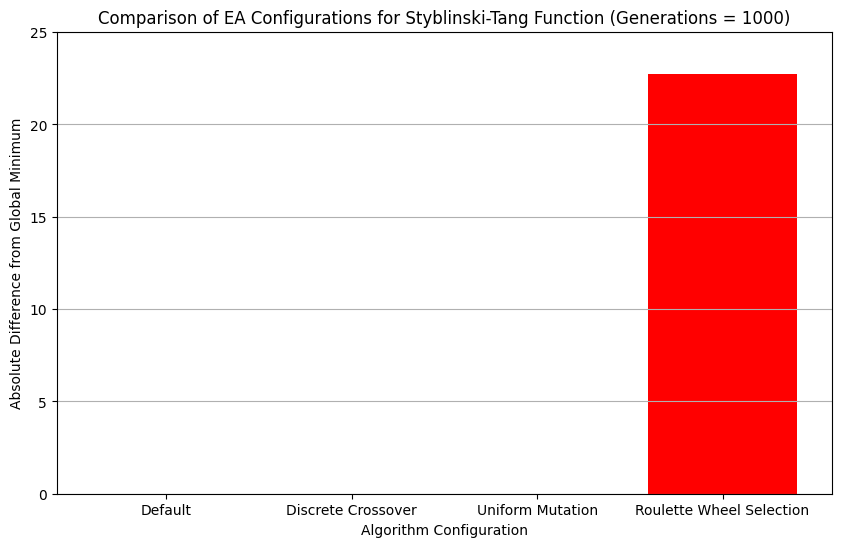

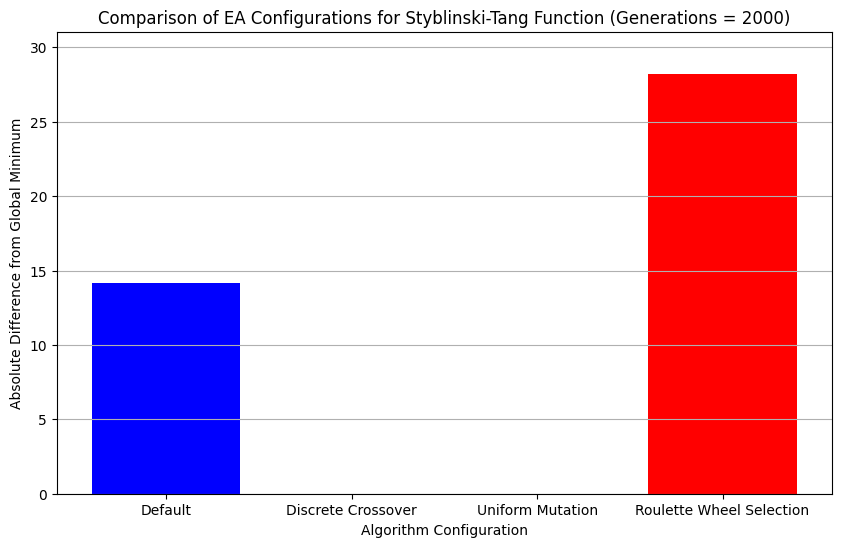

In [31]:
# Parameters
population_size = 100
mutation_rate = 0.2
dimensions = 5
generations_list = [100, 1000, 2000]

# Function to run the evolutionary algorithm with different configurations
def run_ea_with_generations(generations):
    configurations = [
        ('Default', {}),
        ('Discrete Crossover', {'crossover_method': 'discrete'}),
        ('Uniform Mutation', {'mutation_method': 'uniform'}),
        ('Roulette Wheel Selection', {'selection_method': 'roulette_wheel'})
    ]

    abs_diffs = []
    for config_name, config_params in configurations:
        best_val, _ = evolutionary_algorithm(
            population_size, dimensions, generations, mutation_rate, -5, 5,  **config_params, fitness_function=styblinski_tang_function, generate_population=generate_population_styblinski_tang, replace_population=replace_population_styblinski_tang
        )
        abs_diff = get_absolute_difference_styblinski_tang(best_val)
        abs_diffs.append((config_name, abs_diff))
    return abs_diffs

# Dictionary to store absolute differences for all generations
all_abs_diffs = {}

# Run the evolutionary algorithm for each generation and store the results
for generations in generations_list:
    abs_diffs = run_ea_with_generations(generations)
    all_abs_diffs[generations] = abs_diffs

# Plot the results for each generation
for generations, abs_diffs in all_abs_diffs.items():
    # Create box plot
    plt.figure(figsize=(10, 6))
    labels, values = zip(*abs_diffs)
    colors = ['blue', 'orange', 'green', 'red']
    plt.bar(labels, values, color=colors)

    # Update layout
    plt.title(f'Comparison of EA Configurations for Styblinski-Tang Function (Generations = {generations})')
    plt.xlabel('Algorithm Configuration')
    plt.ylabel('Absolute Difference from Global Minimum')
    plt.ylim(0, max(values) * 1.1)  # Add some space above the highest bar
    plt.grid(axis='y')

    # Show plot
    plt.show()

### **Default** vs. **Discrete Crossover & Uniform Mutation** over different generations
   - Decided to compare the two configurations that performed the best in the previous tests.
   - FOr both dimensions (`5` and `15`), the **Discrete Crossover** and **Uniform Mutation** configuration performed better than the default configuration, converging  close to the global minimum after about 100 generations for `5` dimensions and `500` generations for `15` dimensions.

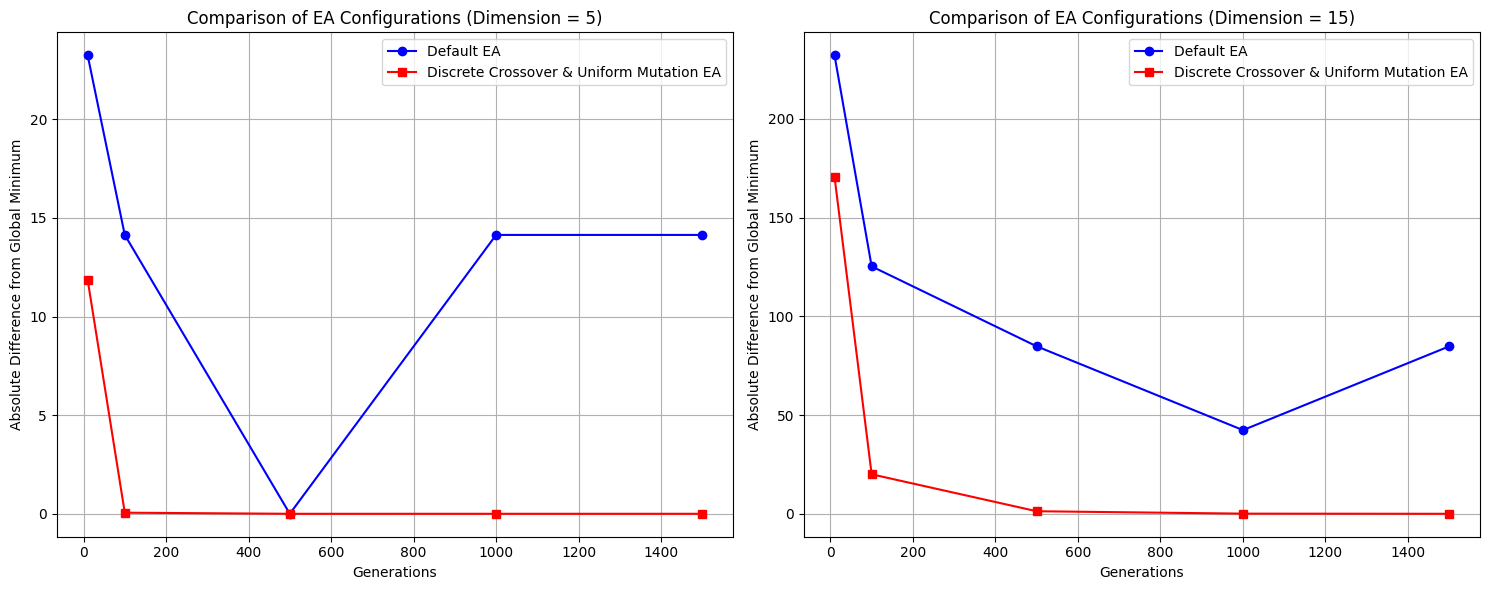

In [33]:
# Parameters
population_size = 100
mutation_rate = 0.2
generations_list = [10, 100, 500, 1000, 1500]
dimensions_list = [5, 15]

# Function to run the evolutionary algorithm and get the absolute difference
def run_ea(generations, dimensions, crossover_method='complete_average', mutation_method='normally_distributed'):
    abs_diffs = []
    for gen in generations:
        best_val, _ = evolutionary_algorithm(
            population_size, dimensions, generations, mutation_rate, -5, 5, crossover_method=crossover_method, mutation_method=mutation_method, fitness_function=styblinski_tang_function, generate_population=generate_population_styblinski_tang, replace_population=replace_population_styblinski_tang
        )

        abs_diff = get_absolute_difference_styblinski_tang(best_val)
        abs_diffs.append(abs_diff)
    return abs_diffs

# Run the EA with default values and discrete crossover & uniform mutation for each dimension
results = {}
for dimensions in dimensions_list:
    default_abs_diffs = run_ea(generations_list, dimensions)
    discrete_uniform_abs_diffs = run_ea(generations_list, dimensions, crossover_method='discrete', mutation_method='uniform')
    results[dimensions] = (default_abs_diffs, discrete_uniform_abs_diffs)

# Plot the results side by side
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

for ax, (dimensions, (default_abs_diffs, discrete_uniform_abs_diffs)) in zip(axes, results.items()):
    ax.plot(generations_list, default_abs_diffs, 'bo-', label='Default EA')
    ax.plot(generations_list, discrete_uniform_abs_diffs, 'rs-', label='Discrete Crossover & Uniform Mutation EA')
    ax.set_title(f'Comparison of EA Configurations (Dimension = {dimensions})')
    ax.set_xlabel('Generations')
    ax.set_ylabel('Absolute Difference from Global Minimum')
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()

### Comparison of EA (Discrete Crossover & Uniform Mutation) over different population sizes and mutation rates
   - Population sizes kept improving results until about `150`, but the computation also increased due to having more individuals to evaluate.
   - Mutations rate below `0.1` and above `0.5` performed poorly due to not exploring the search space enough or too much exploration, respectively.
   - The best results were achieved with a mutation rate of `0.25` and a population size of `150`.

| Population Size | Mutation Rate | Absolute Difference | Computation Time (s) |
|-----------------|---------------|----------------------|----------------------|
| 10              | 0.01          | 1.8520036608         | 0.05                 |
| 10              | 0.1           | 1.1502821736         | 0.05                 |
| 10              | 0.25          | 1.5733306978         | 0.05                 |
| 10              | 0.5           | 1.2810730234         | 0.06                 |
| 10              | 0.7           | 11.3632938654        | 0.05                 |
| 50              | 0.01          | 2.8231023359         | 0.67                 |
| 50              | 0.1           | 0.4012772652         | 0.35                 |
| 50              | 0.25          | 0.2054879871         | 0.30                 |
| 50              | 0.5           | 0.5957892545         | 0.31                 |
| 50              | 0.7           | 8.5480484854         | 0.28                 |
| 100            

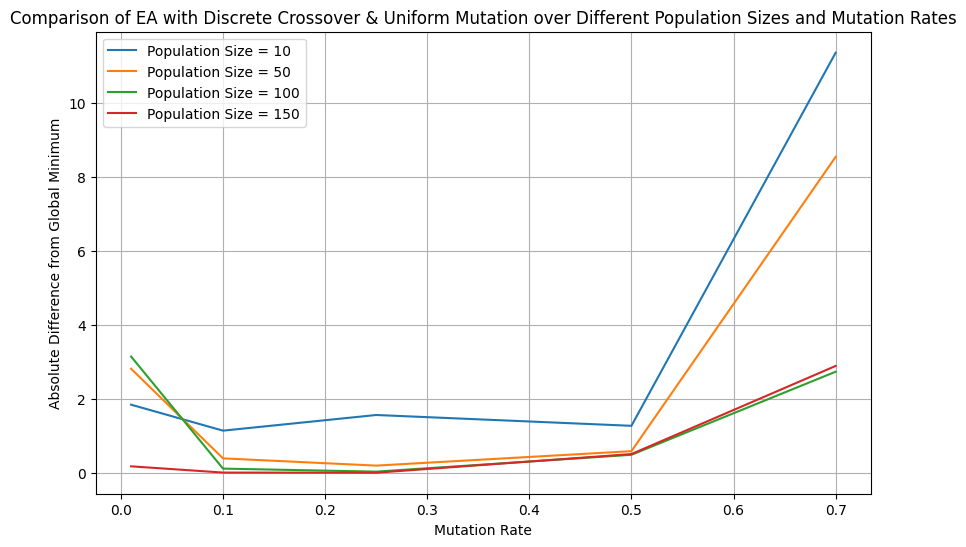

In [38]:
# Parameters
generations = 100
dimensions = 5
mutation_rates = [0.01, 0.1, 0.25, 0.5, 0.7]
population_sizes = [10, 50, 100, 150]

# Function to run the evolutionary algorithm and get the absolute difference and computation time
def run_ea_with_population_sizes(population_sizes, mutation_rates, dimensions, generations):
    results = {}
    table_data = []

    for pop_size in population_sizes:
        abs_diffs = []
        for rate in mutation_rates:
            start_time = time.time()
            best_val, _ = evolutionary_algorithm(
            population_size, dimensions, generations, mutation_rate, -5, 5, crossover_method='discrete', mutation_method='uniform', fitness_function=styblinski_tang_function, generate_population=generate_population_styblinski_tang, replace_population=replace_population_styblinski_tang
        )
            computation_time = time.time() - start_time
            abs_diff = get_absolute_difference_styblinski_tang(best_val)
            abs_diffs.append(abs_diff)
            table_data.append((pop_size, rate, abs_diff, computation_time))
        results[pop_size] = abs_diffs

    # Generate markdown table
    table_md = "| Population Size | Mutation Rate | Absolute Difference | Computation Time (s) |\n"
    table_md += "|-----------------|---------------|----------------------|----------------------|\n"
    for row in table_data:
        table_md += f"| {row[0]:<15} | {row[1]:<13} | {row[2]:<20.10f} | {row[3]:<20.2f} |\n"

    print(table_md)
    return results

# Run the EA with different population sizes and mutation rates
results = run_ea_with_population_sizes(population_sizes, mutation_rates, dimensions, generations)

# Plot the results
plt.figure(figsize=(10, 6))
for pop_size, abs_diffs in results.items():
    plt.plot(mutation_rates, abs_diffs, label=f'Population Size = {pop_size}')

plt.xlabel('Mutation Rate')
plt.ylabel('Absolute Difference from Global Minimum')
plt.title('Comparison of EA with Discrete Crossover & Uniform Mutation over Different Population Sizes and Mutation Rates')
plt.legend()
plt.grid(True)
plt.show()

| Population Size | Mutation Rate | Absolute Difference | Computation Time (s) |
|-----------------|---------------|----------------------|----------------------|
| 10              | 0.01          | 1.8520036608         | 0.05                 |
| 10              | 0.1           | 1.1502821736         | 0.05                 |
| 10              | 0.25          | 1.5733306978         | 0.05                 |
| 10              | 0.5           | 1.2810730234         | 0.06                 |
| 10              | 0.7           | 11.3632938654        | 0.05                 |
| 50              | 0.01          | 2.8231023359         | 0.67                 |
| 50              | 0.1           | 0.4012772652         | 0.35                 |
| 50              | 0.25          | 0.2054879871         | 0.30                 |
| 50              | 0.5           | 0.5957892545         | 0.31                 |
| 50              | 0.7           | 8.5480484854         | 0.28                 |
| 100             | 0.01          | 3.1533539406         | 0.72                 |
| 100             | 0.1           | 0.1242485530         | 0.71                 |
| 100             | 0.25          | 0.0427799218         | 0.66                 |
| 100             | 0.5           | 0.4977605241         | 0.71                 |
| 100             | 0.7           | 2.7431420371         | 0.70                 |
| 150             | 0.01          | 0.1862359129         | 1.32                 |
| 150             | 0.1           | 0.0175412839         | 1.36                 |
| 150             | 0.25          | 0.0133422177         | 1.35                 |
| 150             | 0.5           | 0.5176598766         | 1.38                 |
| 150             | 0.7           | 2.8987900379         | 1.49                 |